In [1]:
# init code
%matplotlib inline 

import pandas as pd
import matplotlib.pyplot as plt
import math
import string
from datetime import date

In [2]:
def parse_column(str):
    if str=='Long':
        return 'Lon'
    elif str[0].isdigit():
        year=str.split('/')[2]
        month=str.split('/')[0]
        day=str.split('/')[1]
        return '2020-'+month.zfill(2)+'-'+day.zfill(2)
    else:
        return str
    

In [3]:
# Total Case
d_case=pd.read_csv('time_series_19-covid-Confirmed.csv')

d_case.columns=[parse_column(x) for x in d_case.columns]
dates=[d for d in d_case.columns if d[0].isdigit()]
countries = d_case.shape[0]

for d in dates:
    d_case[d] = pd.to_numeric(d_case[d], downcast='float')

In [4]:
# New cases
d_new_case=d_case[['Province/State', 'Country/Region', 'Lat', 'Lon']]

for i in range(0, len(dates)-1):
    d_new_case[dates[i+1]] = d_case[dates[i+1]]-d_case[dates[i]]

# convert to log10 for scaling

for d in dates[1:]:
    for i in range(0, countries):
        if d_new_case[d][i] < 0 :
            print(d, i, d_new_case[d][i])
            d_new_case[d][i] = 0
        d_new_case[d][i] = float(math.log10(d_new_case[d][i]+1))

/Users/weidongyang/opt/anaconda3/envs/BSR/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/weidongyang/opt/anaconda3/envs/BSR/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/weidongyang/opt/anaconda3/envs/BSR/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

2020-01-23 1 -1.0
2020-01-31 8 -1.0
2020-02-02 8 -1.0
2020-02-07 1 -20.0
2020-02-29 22 -8.0
2020-03-06 71 -1.0
2020-03-06 165 -10.0
2020-03-09 205 -2.0
2020-03-10 247 -1.0
2020-03-10 248 -1.0
2020-03-10 249 -1.0
2020-03-10 250 -1.0
2020-03-10 251 -1.0
2020-03-10 252 -1.0
2020-03-10 253 -1.0
2020-03-10 254 -1.0
2020-03-10 255 -1.0
2020-03-10 256 -2.0
2020-03-10 257 -3.0
2020-03-10 258 -1.0
2020-03-10 259 -1.0
2020-03-10 260 -1.0
2020-03-10 261 -1.0
2020-03-10 262 -1.0
2020-03-10 263 -2.0
2020-03-10 264 -1.0
2020-03-10 265 -1.0
2020-03-10 266 -1.0
2020-03-10 267 -2.0
2020-03-10 268 -1.0
2020-03-10 269 -1.0
2020-03-10 270 -1.0
2020-03-10 271 -1.0
2020-03-10 272 -1.0
2020-03-10 273 -1.0
2020-03-10 274 -1.0
2020-03-10 275 -1.0
2020-03-10 276 -1.0
2020-03-10 277 -2.0
2020-03-10 278 -1.0
2020-03-10 279 -2.0
2020-03-10 280 -5.0
2020-03-10 281 -2.0
2020-03-10 282 -3.0
2020-03-10 283 -2.0
2020-03-10 284 -2.0
2020-03-10 285 -4.0
2020-03-10 286 -2.0
2020-03-10 287 -1.0
2020-03-10 288 -1.0
2020-03-

In [5]:
# Process Death
d_death = pd.read_csv('time_series_19-covid-Deaths.csv')
d_death.columns=[parse_column(x) for x in d_death.columns]

dates=[d for d in d_death.columns if d[0].isdigit()]

for d in dates:
    d_death[d] = pd.to_numeric(d_death[d], downcast='float')

In [6]:
# Death rate, number death past 3 days
d_new_case['death_per_100_case'] = d_death[dates[-1]] / d_case[dates[-1]] * 100
d_new_case['death_past_3_days']=d_death[dates[-1]] - d_death[dates[-4]]

# Exclude Hubei
# No need any more
# d_new_case['death_past_3_days'] = d_new_case['death_past_3_days'].apply(lambda x: x if x < 300 else 0)
# d_new_case['threshold'] = d_new_case['death_past_3_days'].apply(lambda x: 1 if x > 1 else 0)
# d_new_case['death_per_100_case'] = d_new_case['death_per_100_case'] * d_new_case['threshold']

# d_new_case = d_new_case.drop('threshold', axis=1)

d_new_case.to_csv('new_confirmed.csv', index=False)

In [7]:
# Process Recover
d_recover = pd.read_csv('time_series_19-covid-Recovered.csv')
d_recover.columns=[parse_column(x) for x in d_recover.columns]

dates=[d for d in d_recover.columns if d[0].isdigit()]

for d in dates:
    d_recover[d] = pd.to_numeric(d_recover[d], downcast='float')

In [8]:
# create by date data

d_death_stat=d_death.melt(id_vars=["Province/State", "Country/Region", "Lat", "Lon"], 
        var_name="Date", 
        value_name="Death")

d_case_stat=d_case.melt(id_vars=["Province/State", "Country/Region", "Lat", "Lon"], 
        var_name="Date", 
        value_name="Cases")

d_recover_stat=d_recover.melt(id_vars=["Province/State", "Country/Region", "Lat", "Lon"], 
        var_name="Date", 
        value_name="Recovered")

d_stat = pd.merge(d_case_stat, d_death_stat, on = ['Lat', 'Lon', 'Province/State', 'Country/Region', 'Date'])
d_stat = pd.merge(d_stat, d_recover_stat, on = ['Lat', 'Lon', 'Province/State', 'Country/Region', 'Date'])

d_stat['Cases_log']=d_stat['Cases'].apply(lambda x: math.log10(x+1))
d_stat['Death_log']=d_stat['Death'].apply(lambda x: math.log10(x+1))
d_stat['Recovered_log']=d_stat['Recovered'].apply(lambda x: math.log10(x+1))

d_stat=d_stat[d_stat['Cases']>0]
d_stat.to_csv('regionStat.csv', index=False)

d_stat['IsChina']=d_stat['Country/Region'].apply(lambda x: 'China' if x == 'China' else 'Other')

d_stat['Cases']=d_stat['Cases']

d_grouped = d_stat.groupby(['IsChina', 'Date'])['Cases', 'Death', 'Recovered'].sum().reset_index()

In [9]:
d_stat['Country/Region'].unique()

array(['Thailand', 'Japan', 'China', 'Korea, South', 'Taiwan*', 'US',
       'Singapore', 'Vietnam', 'France', 'Nepal', 'Malaysia', 'Australia',
       'Canada', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland',
       'United Arab Emirates', 'Philippines', 'India', 'Italy', 'Sweden',
       'Russia', 'United Kingdom', 'Spain', 'Belgium', 'Cruise Ship',
       'Egypt', 'Iran', 'Lebanon', 'Israel', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Pakistan', 'Brazil', 'Georgia',
       'Greece', 'North Macedonia', 'Norway', 'Romania', 'Estonia',
       'San Marino', 'Denmark', 'Netherlands', 'Belarus', 'Iceland',
       'Lithuania', 'Mexico', 'New Zealand', 'Nigeria', 'Ireland',
       'Luxembourg', 'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan',
       'Armenia', 'Dominican Republic', 'Czechia', 'Indonesia',
       'Portugal', 'Andorra', 'Latvia', 'Morocco', 'Saudi Arabia',
       'Senegal', 'Argentina', 'Chile', 'Jordan', 'Ukra

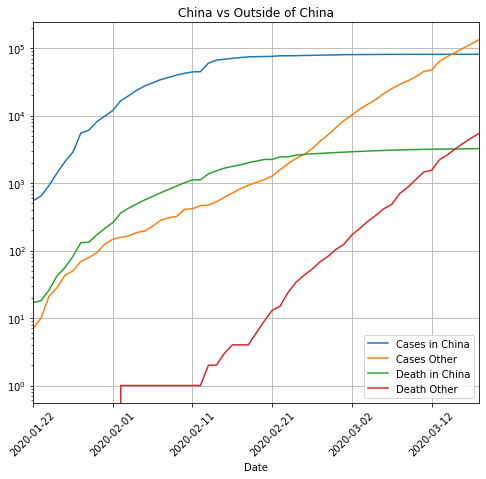

In [10]:
fig, ax1 = plt.subplots()

d_grouped.pivot(index='Date', columns = 'IsChina', values = ['Cases', 'Death']).plot(
    ax = ax1, logy=True, rot=45, 
    figsize=(8, 7), grid=True, title="China vs Outside of China")
ax1.legend(['Cases in China', 'Cases Other', 'Death in China', 'Death Other'])

In [11]:
fig.savefig("china vs other.png")

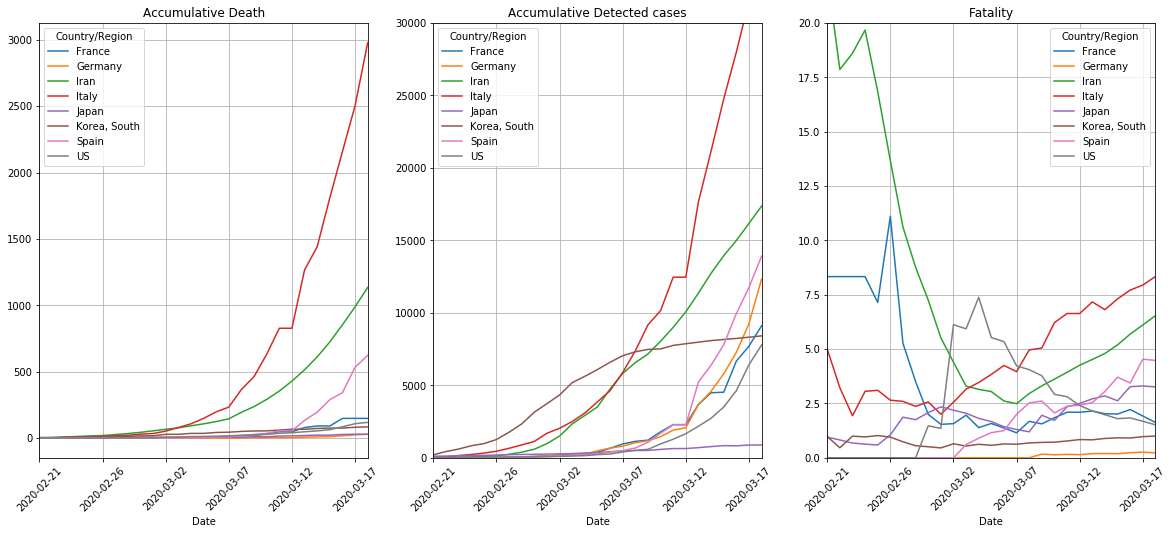

In [12]:
d_country_stat = d_stat.groupby(['Country/Region', 'Date'])['Cases', 'Death', 'Recovered'].sum().reset_index()

d_country_stat['DeathPer100Cases']=d_country_stat['Death']/d_country_stat['Cases']*100

d_temp = d_country_stat[d_country_stat['Country/Region'].isin(['Italy', 'US',
    'Korea, South', 'Iran', 'Japan', 'Spain', 'Germany', 'France'])] 

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
# fig, (ax1, ax2) = plt.subplots(1, 2)

d_temp[d_temp['Date']>'2020-02-20'] \
.pivot(index='Date', columns='Country/Region', values='Death') \
.plot(ax = ax1, rot=45, grid=True, figsize=(20, 8), title='Accumulative Death')

d_temp[d_temp['Date']>'2020-02-20'] \
.pivot(index='Date', columns='Country/Region', values='Cases') \
.plot(ax = ax2, rot=45, grid=True, figsize=(20, 8), title='Accumulative Detected cases', ylim=(0, 30000))

d_temp[d_temp['Date']>'2020-02-20'] \
.pivot(index='Date', columns='Country/Region', values='DeathPer100Cases') \
.plot(ax = ax3, rot=45, grid=True, figsize=(20, 8), title='Fatality', ylim=(0, 20))



In [13]:
# fig = the_plot.get_figure()
fig.savefig("cases_vs_death_timeline.png")

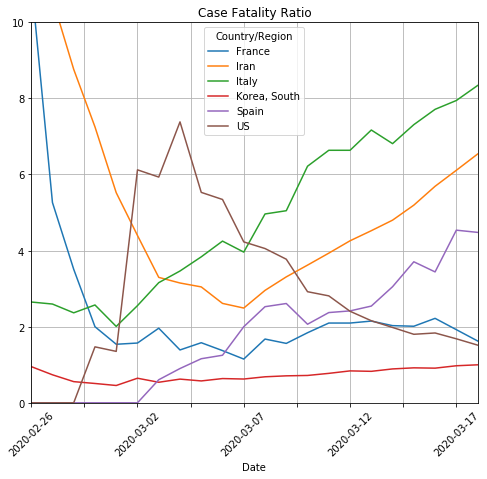

In [14]:
d_temp = d_country_stat[d_country_stat['Country/Region'].isin(['Italy', 'US',
    'Korea, South', 'Iran', 'Spain', 'France'])] 

fig, ax = plt.subplots()
d_temp[d_temp['Date']>'2020-02-25'] \
.pivot(index='Date', columns='Country/Region', values='DeathPer100Cases') \
.plot(ax = ax, rot=45, grid=True, figsize=(8, 7), title='Case Fatality Ratio', ylim=(0, 10))

In [15]:
fig.savefig("fatality_trend.png")

In [16]:
lastDay = d_country_stat[(d_country_stat['Date']==dates[-1]) & (d_country_stat['Death']>20)]

lastDay['FatalityRate']=lastDay['DeathPer100Cases'].apply(lambda x: str(x)[0:4]+'%')
lastDay['Cases_log']=lastDay['Cases'].apply(lambda x: math.log(x))
lastDay['Death_log']=lastDay['Death'].apply(lambda x: math.log(x))
lastDay

lastDay.to_csv('latest fatality rate.csv', index=False)

/Users/weidongyang/opt/anaconda3/envs/BSR/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/weidongyang/opt/anaconda3/envs/BSR/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/weidongyang/opt/anaconda3/envs/BSR/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarn

In [17]:
# d_temp = d_stat[d_stat['Country/Region'].isin(['Germany', 'France', 'Spain'])] 

# d_temp[d_temp['Date']>'2020-02-15'] \
# .pivot(index='Date', columns='Country/Region', values='Cases') \
# .plot(rot=45, grid=True, figsize=(7, 7))

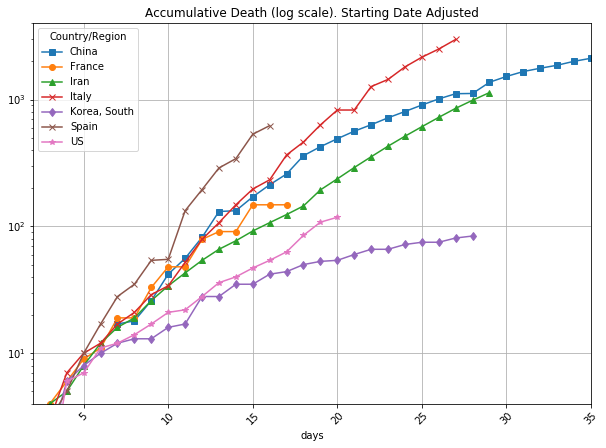

In [18]:
d_start=pd.DataFrame([
    ['China', '2020-01-15'],     
    ['France', '2020-03-01'],     
    ['Iran', '2020-02-18'],
    ['Italy', '2020-02-20'], 
    ['Korea, South', '2020-02-19'],
    ['Spain', '2020-03-02'], 
    ['US', '2020-02-27']   
])

d_start.columns = ['Country/Region', 'StartDate']
# ['Mainland China', '2020-01-22'], 

# 'Mainland China', 
d_compare = d_country_stat[d_country_stat['Country/Region'].isin(['China', 'Italy', 'Korea, South', 'US', 'Iran', 'Spain', 'France'])]
d_death_growth = d_compare.groupby(['Country/Region', 'Date'])['Death'].sum().reset_index()
d_death_growth = pd.merge(d_death_growth, d_start, on='Country/Region')

d_death_growth['days'] = d_death_growth.apply(lambda x: 
    (date(*map(int, x['Date'].split('-'))) - date(*map(int, x['StartDate'].split('-')))).days, axis = 1)

fig, ax = plt.subplots()

the_plot = d_death_growth[(d_death_growth['days']>2) & (d_death_growth['days']<230) ]\
.pivot(index='days', columns='Country/Region', values='Death') \
.plot(ax = ax, rot=45, grid=True, figsize=(10, 7), style=['s-','o-','^-', 'x-', 'd-', 'x-', '*-'], 
      logy=True, ylim=(4, 4000), xlim=(2, 35),
      title='Accumulative Death (log scale). Starting Date Adjusted', label=['aa'])

# ax.legend(list(d_start['Country/Region'] + '--' + d_start['StartDate']))

In [19]:
fig = the_plot.get_figure()

fig.savefig("accumulative_death.png")

In [20]:
d_country_stat['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cruise Ship', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador',
       'Egypt', 'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia, The', 'Georgia', 'Germany',
       'Ghana', 'Greece', 'Greenland', 'Guatemala', 'Guinea', 'Guyana',
       'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 

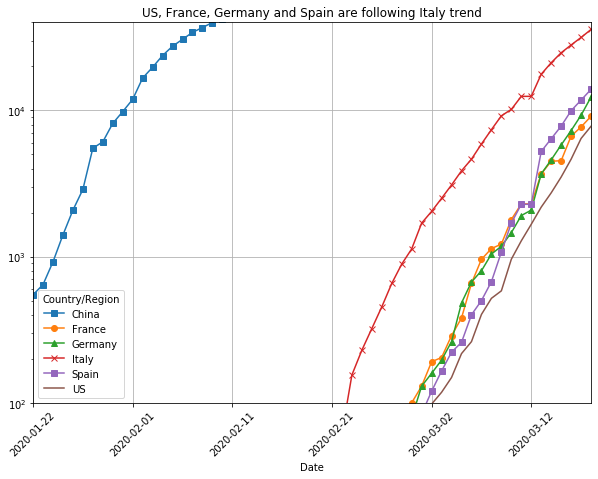

In [21]:
d_compare = d_stat[d_stat['Country/Region'].isin(['China','Italy', 'Germany', 'Spain', 'France', 'US'])]

d_cases_growth = d_compare.groupby(['Country/Region', 'Date'])['Cases'].sum().reset_index()
# d_cases_growth = pd.merge(d_cases_growth, d_start, on='Country/Region')

# d_cases_growth['days'] = d_cases_growth.apply(lambda x: 
#     (date(*map(int, x['Date'].split('-'))) - date(*map(int, x['StartDate'].split('-')))).days, axis = 1)

fig, ax = plt.subplots()

# the_plot = d_cases_growth[(d_cases_growth['days']>-4) & (d_cases_growth['days']<48) ]\
the_plot = d_cases_growth[d_cases_growth['Date']>'2020-01-10'].pivot(index='Date', columns='Country/Region', values='Cases') \
.plot(ax = ax, rot=45, grid=True, figsize=(10, 7), style=['s-','o-','^-', 'x-', 's-'], logy=True, ylim=[100, 40000],
      title='US, France, Germany and Spain are following Italy trend')

# ax.legend(list(d_start['Country/Region'] + '--' + d_start['StartDate']))

In [22]:
fig.savefig("following italy.png")

In [23]:
d_country_stat=d_compare.groupby(['Country/Region', 'Date'])['Cases', 'Death'].sum().reset_index()
d_country_stat=pd.merge(d_country_stat, d_start, on='Country/Region')
d_country_stat['days'] = d_country_stat.apply(lambda x: 
    (date(*map(int, x['Date'].split('-'))) - date(*map(int, x['StartDate'].split('-')))).days, axis = 1)
d_country_stat['CasesLog']=d_country_stat['Cases'].apply(lambda x: math.log(x+1))
d_country_stat['DeathLog']=d_country_stat['Death'].apply(lambda x: math.log(x+1))
d_country_stat['CFR']=d_country_stat.apply(lambda x: x['Death']/(x['Cases']+0.0001), axis = 1)
d_country_stat

,Country/Region,Date,Cases,Death,StartDate,days,CasesLog,DeathLog,CFR
0,China,2020-01-22,548.0,17.0,2020-01-15,7,6.308098,2.890372,0.031022
1,China,2020-01-23,643.0,18.0,2020-01-15,8,6.467699,2.944439,0.027994
2,China,2020-01-24,920.0,26.0,2020-01-15,9,6.825460,3.295837,0.028261
3,China,2020-01-25,1406.0,42.0,2020-01-15,10,7.249215,3.761200,0.029872
4,China,2020-01-26,2075.0,56.0,2020-01-15,11,7.638198,4.043051,0.026988
...,...,...,...,...,...,...,...,...,...
259,US,2020-03-14,2727.0,54.0,2020-02-27,16,7.911324,4.007333,0.019802
260,US,2020-03-15,3499.0,63.0,2020-02-27,17,8.160518,4.158883,0.018005
261,US,2020-03-16,4632.0,85.0,2020-02-27,18,8.440960,4.454347,0.018351
262,US,2020-03-17,6421.0,108.0,2020-02-27,19,8.767485,4.691348,0.016820


In [24]:
d_country_stat.to_csv('country_stat.csv', index=False)

In [25]:
d_stat.head()

,Province/State,Country/Region,Lat,Lon,Date,Cases,Death,Recovered,Cases_log,Death_log,Recovered_log,IsChina
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0,0.477121,0.000000,0.000000,Other
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0,0.477121,0.000000,0.000000,Other
154,Hubei,China,30.9756,112.2707,2020-01-22,444.0,17.0,28.0,2.648360,1.255273,1.462398,China
156,NaN,"Korea, South",36.0000,128.0000,2020-01-22,1.0,0.0,0.0,0.301030,0.000000,0.000000,Other
158,Guangdong,China,23.3417,113.4244,2020-01-22,26.0,0.0,0.0,1.431364,0.000000,0.000000,China


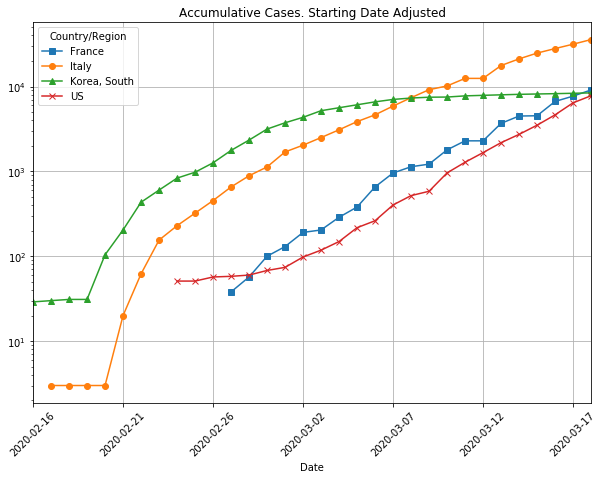

In [26]:
d_compare = d_stat[d_stat['Country/Region'].isin(['Italy', 'Germany', 'France', 'Korea, South', 'US'])]

d_cases_growth = d_compare.groupby(['Country/Region', 'Date'])['Cases'].sum().reset_index()
d_cases_growth = pd.merge(d_cases_growth, d_start, on='Country/Region')

d_cases_growth['days'] = d_cases_growth.apply(lambda x: 
    (date(*map(int, x['Date'].split('-'))) - date(*map(int, x['StartDate'].split('-')))).days, axis = 1)

fig, ax = plt.subplots()

the_plot = d_cases_growth[(d_cases_growth['days']>-4) & (d_cases_growth['days']<48) ]\
.pivot(index='Date', columns='Country/Region', values='Cases') \
.plot(ax = ax, rot=45, grid=True, figsize=(10, 7), style=['s-','o-','^-', 'x-'], logy=True, #ylim=[0, 3000],
      title='Accumulative Cases. Starting Date Adjusted')


In [27]:
d_stat[d_stat['Country/Region'].isin(['Italy', 'Germany', 'Spain', 'France', 'US'])]['Country/Region'].unique()

array(['US', 'France', 'Germany', 'Italy', 'Spain'], dtype=object)

In [28]:
d_current = d_compare[d_compare['Date']=='2020-02-29']
d_current['rate']=d_current['Death']/d_current['Cases']*100
d_current

/Users/weidongyang/opt/anaconda3/envs/BSR/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Province/State,Country/Region,Lat,Lon,Date,Cases,Death,Recovered,Cases_log,Death_log,Recovered_log,IsChina,rate
17567,NaN,Germany,51.0000,9.0000,2020-02-29,79.0,0.0,16.0,1.903090,0.000000,1.230449,Other,0.000000
17572,NaN,Italy,43.0000,12.0000,2020-02-29,1128.0,29.0,46.0,3.052694,1.477121,1.672098,Other,2.570922
17658,Diamond Princess,US,35.4437,139.6380,2020-02-29,44.0,0.0,0.0,1.653213,0.000000,0.000000,Other,0.000000
17712,NaN,"Korea, South",36.0000,128.0000,2020-02-29,3150.0,16.0,27.0,3.498448,1.230449,1.447158,Other,0.507936
17713,France,France,46.2276,2.2137,2020-02-29,100.0,2.0,12.0,2.004321,0.477121,1.113943,Other,2.000000
17869,"Santa Clara County, CA",US,37.3541,-121.9552,2020-02-29,3.0,0.0,1.0,0.602060,0.000000,0.301030,Other,0.000000
17877,"Suffolk County, MA",US,42.3601,-71.0589,2020-02-29,1.0,0.0,1.0,0.301030,0.000000,0.301030,Other,0.000000
17884,"Orange County, CA",US,33.7879,-117.8531,2020-02-29,1.0,0.0,0.0,0.301030,0.000000,0.000000,Other,0.000000
17886,"Maricopa County, AZ",US,33.2918,-112.4291,2020-02-29,1.0,0.0,1.0,0.301030,0.000000,0.301030,Other,0.000000
17896,"Washington County, OR",US,45.5470,-123.1386,2020-02-29,1.0,0.0,0.0,0.301030,0.000000,0.000000,Other,0.000000


In [29]:
2870.0/79826

0.03595319820609826

In [30]:
d_stat

,Province/State,Country/Region,Lat,Lon,Date,Cases,Death,Recovered,Cases_log,Death_log,Recovered_log,IsChina
0,NaN,Thailand,15.0000,101.0000,2020-01-22,2.0,0.0,0.0,0.477121,0.000000,0.000000,Other
1,NaN,Japan,36.0000,138.0000,2020-01-22,2.0,0.0,0.0,0.477121,0.000000,0.000000,Other
154,Hubei,China,30.9756,112.2707,2020-01-22,444.0,17.0,28.0,2.648360,1.255273,1.462398,China
156,NaN,"Korea, South",36.0000,128.0000,2020-01-22,1.0,0.0,0.0,0.301030,0.000000,0.000000,Other
158,Guangdong,China,23.3417,113.4244,2020-01-22,26.0,0.0,0.0,1.431364,0.000000,0.000000,China
...,...,...,...,...,...,...,...,...,...,...,...,...
26329,Aruba,Netherlands,12.5186,-70.0358,2020-03-18,4.0,0.0,0.0,0.698970,0.000000,0.000000,Other
26330,NaN,Zambia,-15.4167,28.2833,2020-03-18,2.0,0.0,0.0,0.477121,0.000000,0.000000,Other
26331,NaN,Djibouti,11.8251,42.5903,2020-03-18,1.0,0.0,0.0,0.301030,0.000000,0.000000,Other
26332,NaN,"Gambia, The",13.4432,-15.3101,2020-03-18,1.0,0.0,0.0,0.301030,0.000000,0.000000,Other


In [31]:
d_high_death = d_stat[(d_stat['Date']=='2020-02-29') & (d_stat['Death']>2)]

In [32]:
d_high_death['Rate']=d_high_death['Death']/d_high_death['Cases']*100

/Users/weidongyang/opt/anaconda3/envs/BSR/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


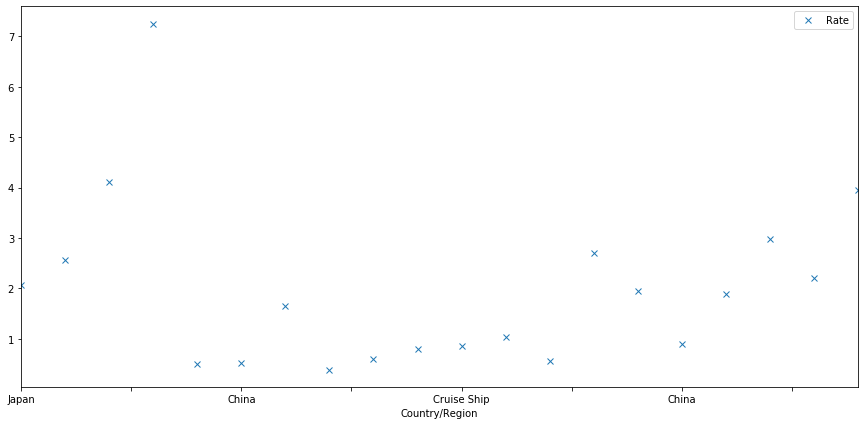

In [33]:
d_high_death.plot(x='Country/Region', y='Rate', style=['x'], figsize=(15, 7))

In [3]:
DateTime

NameError: name 'DateTime' is not defined

In [34]:
2.5 * 400 / 24 /10

4.166666666666666